<a href="https://colab.research.google.com/github/sriramreddy-7/J_Component_Project/blob/main/Random_Forest_Classifiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
data_dir = '/content/drive/MyDrive/J_CompAIML/DATASET/BTDS'
classes = ['BrainTumor', 'Healthy']
num_classes = len(classes)

X = []
y = []
for i in range(num_classes):
    path = os.path.join(data_dir, classes[i])
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        img_resized = cv2.resize(img_array, (150, 150))
        X.append(img_resized)
        y.append(i)


In [4]:
X = np.array(X)
y = np.array(y)

In [5]:
print(X.shape,y.shape)

(4612, 150, 150) (4612,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train.reshape(X_train.shape[0], -1), y_train)

RandomForestClassifier(random_state=42)

In [8]:
y_pred = rfc.predict(X_test.reshape(X_test.shape[0], -1))
accuracy_rfc = (y_pred == y_test).mean()

In [9]:
print("Accuracy Random Forest:", accuracy_rfc)

Accuracy Random Forest: 0.9566630552546046


In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

<Axes: >

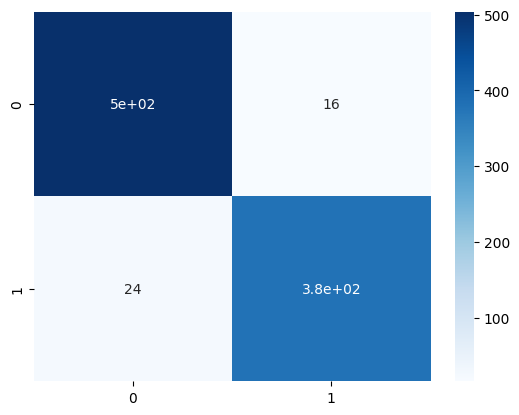

In [17]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap="Blues")

In [14]:
img_path = "/content/Not Cancer.jpeg"
img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img_resized = cv2.resize(img_array, (150, 150))
img = img_resized.flatten().reshape(1, -1)
prediction = rfc.predict(img)



In [15]:
if prediction[0] == 0:
    print("The MRI image is predicted to have a brain tumor.")
else:
    print("The MRI image is predicted to be healthy.")

The MRI image is predicted to be healthy.
